# Тестовое в OZON

In [100]:
import pandas as pd
import numpy as np
import random
import seaborn as sns

## Задание 1

Для выполнения этого задания требуется сгенерировать `DataFrame` с синтетическими данными. `DataFrame` должен состоять из `10000` строк и `5` колонок. Каждую из колонок мы предлагаем тебе создать и наполнить следующим образом:

* 1-я колонка – `user_id` – идентификатор пользователя. Длина `user_id` должна равняться 15-ти символам. Идентификатор состоит из случайной комбинации следующих символов: `"1234567890abcdefghijk"`. Для каждой строки в `DataFrame` значение `user_id` формируются случайным образом.

* 2-я колонка – `order_number` – номер заказа. Столбец необходимо заполнить случайными значениями в диапазоне от `1` до `10`.

* 3-я колонка – `click2delivery` – время, прошедшее с момента оформления заказа до вручения клиенту. Столбец необходимо заполнить случайными значениями из нормального распределения со средним `1440` и стандартным отклонением `200`.

* 4-я колонка – `order_items_sum` – общая стоимость заказа. Значения для этого столбца необходимо взять из экспоненциального распределения с параметром `λ = 1`, смещённого на `+1`.

* 5-я колонка – `retention` – день жизни покупателя, в который он совершил заказ. Необходимо сгенерировать значения `1, 2, 3, 4, 5` с вероятностями `0.35, 0.25, 0.2, 0.15` и `0.05` соответственно.

В случае, если в колонке `user_id` встречаются дублирующиеся значения, оставь только первое из них.

In [5]:
def generate_user_id():
    return(''.join(random.choice('1234567890abcdefghijk') for i in range(15)))
generate_user_id()

'h2ec8dj8de5j3h0'

In [21]:
n = 1000
data = {
    'user_id': [generate_user_id() for i in range(n)],
    'order_number': np.random.randint(1,11, size = n),
    'click2delivery': np.random.normal(1440, 200, size = n),
    'order_items_sum': np.random.exponential(1, size = n)+1,
    'retention': np.random.choice([1,2,3,4,5], p=[0.35, 0.25, 0.2, 0.15, 0.05], size = n)
}

In [27]:
df = pd.DataFrame(data)
df = df.drop_duplicates('user_id', keep = 'first')
df.shape

(1000, 5)

## Задание 2

Для всех строк исходного датасета, сгруппированных по номеру заказа, посчитать среднее значение времени доставки по группе. Результат необходимо добавить в новый столбец датафрейма.

In [35]:
orders = df.groupby('order_number')['click2delivery'].agg(mean_time = 'mean').reset_index()
df = df.merge(orders, on = 'order_number')
df.head()

,user_id,order_number,click2delivery,order_items_sum,retention,mean_time_x,mean_time_y
0,5i8h8ei8hh69604,1,1263.274387,1.747438,1,1466.39854,1466.39854
1,h33g8bd616ji751,1,1215.330603,1.618546,1,1466.39854,1466.39854
2,h52abhhfb9f2d7b,1,1785.505668,1.576264,3,1466.39854,1466.39854
3,5i5jei861h9kkha,1,1296.430826,1.308993,4,1466.39854,1466.39854
4,bb62g61k70f8bh5,1,1464.128270,3.399728,4,1466.39854,1466.39854


## Задание 3

Отдельной колонкой добавить значения последовательности, начинающейся с `0` и `1`, где каждый следующий элемент является суммой двух предыдущих, умноженных на `0.5`.

In [53]:
l = [0,1]
for i in range(998):
    l.append(sum(l[i:i+2:])*0.5)

In [60]:
df['seq'] = l
df.head()

,user_id,order_number,click2delivery,order_items_sum,retention,mean_time_x,mean_time_y,seq
0,5i8h8ei8hh69604,1,1263.274387,1.747438,1,1466.39854,1466.39854,0.000
1,h33g8bd616ji751,1,1215.330603,1.618546,1,1466.39854,1466.39854,1.000
2,h52abhhfb9f2d7b,1,1785.505668,1.576264,3,1466.39854,1466.39854,0.500
3,5i5jei861h9kkha,1,1296.430826,1.308993,4,1466.39854,1466.39854,0.750
4,bb62g61k70f8bh5,1,1464.128270,3.399728,4,1466.39854,1466.39854,0.625


## Задание 4

Напиши функцию, которая принимает на вход значение `user_id` и возвращает строку следующего вида: все буквы в той последовательности, в которой они встречаются в `user_id`, затем квадрат числа, полученного из всех цифр в `user_id` в той последовательности, в которой они встречаются в `user_id`.

Добавь результат применения этой функции к `user_id` в новый столбец. Использование циклов вне функции запрещено.

In [66]:
def func1(user_id):
    alpha = ''.join(filter(str.isalpha, user_id))
    numeric = ''.join(filter(str.isdigit, user_id))
    res = str(alpha) + str(int(numeric)**2)
    return(res)


In [69]:
df['user_id_with_func1'] = df['user_id'].apply(lambda x: func1(x))
df.head()

,user_id,order_number,click2delivery,order_items_sum,retention,mean_time_x,mean_time_y,seq,user_id_with_func1
0,5i8h8ei8hh69604,1,1263.274387,1.747438,1,1466.39854,1466.39854,0.000,iheihh346767410515116816
1,h33g8bd616ji751,1,1215.330603,1.618546,1,1466.39854,1466.39854,1.000,hgbdji114661304057796001
2,h52abhhfb9f2d7b,1,1785.505668,1.576264,3,1466.39854,1466.39854,0.500,habhhfbfdb2801267329
3,5i5jei861h9kkha,1,1296.430826,1.308993,4,1466.39854,1466.39854,0.750,ijeihkkha312055187161
4,bb62g61k70f8bh5,1,1464.128270,3.399728,4,1466.39854,1466.39854,0.625,bbgkfbh3920899333897225


## Задание 5

Вычисли моду, медиану, среднее, дисперсию и стандартное отклонение для столбцов
`click2delivery`, `order_items_sum` и `retention`. Построй гистограммы распределения значений в столбцах.

In [74]:
new_df = df[['click2delivery','order_items_sum','retention']]
new_df.describe().loc[['50%','mean','std']]

,click2delivery,order_items_sum,retention
50%,1435.484309,1.703635,2.00000
mean,1435.439268,1.993546,2.30900
std,207.484790,0.934944,1.23168


In [81]:
mode = new_df.mode().head(1).set_index(pd.Index(['mode']))
mode

,click2delivery,order_items_sum,retention
mode,839.031935,1.001699,1.0


In [94]:
disper = pd.DataFrame(new_df.var()).reset_index().pivot_table(columns = 'index',values = 0).set_index(pd.Index(['disp']))
disper

index,click2delivery,order_items_sum,retention
disp,43049.938073,0.874121,1.517036


In [99]:
ex5 = pd.concat([mode,new_df.describe().loc[['50%','mean','std']],disper])
ex5

index,click2delivery,order_items_sum,retention
mode,839.031935,1.001699,1.000000
50%,1435.484309,1.703635,2.000000
mean,1435.439268,1.993546,2.309000
std,207.484790,0.934944,1.231680
disp,43049.938073,0.874121,1.517036


<AxesSubplot:ylabel='order_items_sum'>

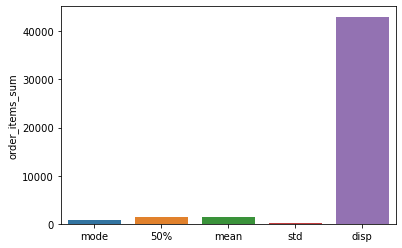

In [111]:
sns.barplot(x = ex5.index, y = ex5['click2delivery']);

<AxesSubplot:ylabel='order_items_sum'>

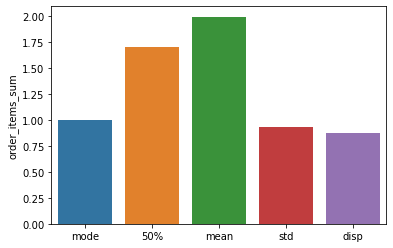

In [112]:
sns.barplot(x = ex5.index, y = ex5['order_items_sum'])

## Задание 6

Построй график, который наиболее полно, на твой взгляд, описывает зависимость времени доставки заказа от его номера. Обоснуй, почему ты так считаешь?

In [116]:
data = df[['order_number','click2delivery']]
data.head()

,order_number,click2delivery
0,1,1263.274387
1,1,1215.330603
2,1,1785.505668
3,1,1296.430826
4,1,1464.128270


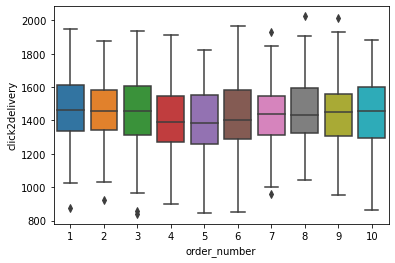

In [119]:
sns.boxplot(data = data, x = 'order_number', y = 'click2delivery');